# __Chapter 4: Training Models__ Revison Notes

__Remarks__: This chapter is to understand the models including 
- Linear Regression Model, two different way to train it :
  1. "Closed-form"  --get best parameters directly by minimizing cost function
  2. Iterative optimization approach -- Gradient Descent (GD)
     - Gradually tweek the model parameters to minimize cost functions over the training set
     - eventually converging to the same parameters as first method
     - Batch GD, Mini-batch GD, Stochastic GD
- Ploynomial Regression
  - A more complex model fit nolinear datasets
  - more prone to overfiting the training data
  - detect wheter or not overfitting by learning curves
  - several regularizatino techniques to reduce overfitting
- Logistic Regression
- Softmax Regression

## Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression

- life_satisfaction = θ0 + θ1 × GDP_per_capita.
- linear regression prediction: Weighted sum of the input features, plus a constant (bias or interception)
  - y' =  θ0 + θ1x1 + θ2x2 + θ3x3 +....
  - y' is the predicted value, 
  - n is number of features, 
  - xi is ith feature value, 
  - θj is jth model parameter
- Linear Regression model prediction (__vectorized form__)
  - y'= Hθ(x) = θx
    - θ is the parameter vector, containing bias θ0 and __feature weights__ θ1 - θn
    - x is the instance's feature vector, (x0 to Xn), X0  always equals to 1
    - Hθ(x) is the hypothesis function, equals to θx (dot product)
- Vectors -- __Column vectors__ -- 2D array with single column.


### Performance Measure: Minimize mean square error (MSE) -- RMSE
- MSE

### The Normal Equation
- To find the value of θ that minimize the cost function, using ___closed-form solution___ --> get result directly
- Thi is called the normal equation
- θ' = (XTX)-1XTy

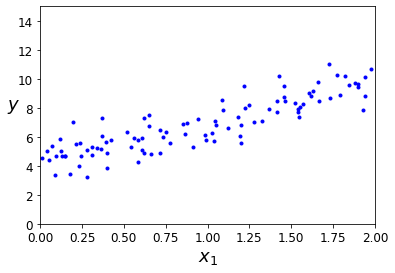

In [2]:
# generate some linear looking data
import numpy as np

# np.random.rand --> Random values in a given shape. here is 100x1 array (all value is 0-1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [3]:
# Compute the θ' using Normal Equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
#X_b is a 100x2 matrix
X_b.T.dot(X_b)

array([[100.        ,  94.03614868],
       [ 94.03614868, 123.47395265]])

In [4]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.03523199, -0.02683222],
       [-0.02683222,  0.02853394]])

In [5]:
# np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T) # 2x2 dot 2x100 --> 2x100

In [6]:
# using inv() function from Numpy linear algebra modul (np.linalg)
# to compute the inverse of a matrix and dot() for matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 2x100 dot 100x1 --> 2x1
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# make predictions using the theda best
# prediction function = H(x) = theta * x
# predict the y value (label vale) at x=0 and x=4
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x=0 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

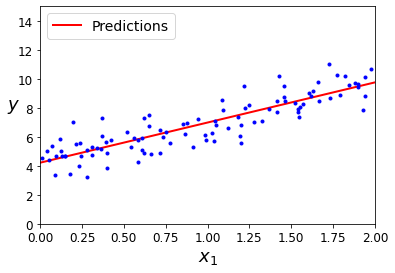

In [8]:
# Plot the model prediction
plt.plot(X_new, y_predict, "r-",linewidth=2,  label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

#### __Performing Linear regression using Scikit learn__

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the __pseudoinverse__ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

1. The pseudoinverse itself is computed using a __standard matrix factorization
   technique__ called __Singular Value Decomposition (SVD)__:
  - (SVD): Decompose training set X into the matrix multiplication of three matrices 
  - matrices $\mathbf{U} \mathbf{Σ} \mathbf{V}^T$  (see ___numpy.linalg.svd()___).
  - pseudoinverse is computed as $\mathbf{X}^+ = \mathbf{V}\mathbf{Σ}^+ \mathbf{U}^\mathbf{T}$
2. To compute matrix$\mathbf{Σ}^+$,  
  - the algorithm takes $\mathbf{Σ}$ and sets to zero if smaller than a tiny threshold
  - replace the non-zero values with their inverse, 
  - finally transpose the resulting matrix
3. This approach is more efficient than __Normal Equation__

## Computational Complexity

1. Normal Equation computes the inverse of $\mathbf{X}^T \mathbf{X}$
   - $(n+1)\times (n+1)$ matrix, n is number of features
   - computational complexity of inverting such matrixs is about $\mathbf{O}^{2.4}$ to $\mathbf{O}^3$
   
2. SVD method used by Scikit learn's Linear regression class is about $\mathbf{O}^2$

# Gradient Descent
- A different way to train Linear regression Model
- Better suited for cases where there are a large number of features or too many instance to fit in memory
- Generic optimization algorithm
1. General idea: 
   - tweek parameters iteratively in order to minize cost function
   - measures __local gradient__ of _error function_, with regard to the parameter vector $\theta$
   - Goes in direction of ___descending gradient___
   - Once the gradient is zero, then you reach the minimum
2. Detail steps
   - Filling $\theta$ with random values (random initialization)
   - improve it gradually, taking one step at a time, each step attempting to __decrease the cost function__
   - Until the algorithm __converges to a minimum__
   - the learning step size is propotional to the slope of cost function
     - so the steps gradually get smaller as parameters approach the minimum
3. Learning step size
   - determined by __learning rate__ hyperparameter
     - If learning rate too small, algorithm will take many iterations to converge --> long time
     - If learning rate too high, might jump across the valley and end up on the other side
4. Not all cost function are nice
   - Maybe holes, ridges, plateaus, irregular terrains. 
   - Making the convergence to minimum difficult
  
5. Fortunately, MSE cost function in Linear Regression is __Convex Function__
   - No Local minima, only one global minimum
   - Also a continuous function with slope never change abruptly
   - __Need to ensure that all features have a similar scale__
   
6. Algorithm search model's ___parameter space___:
   - more parameters, more dimensions space has, the harder ther search is
   

## Batch Gradient Descent

- Compute the gradient of cost function with regard to each model parameter $\theta^j$
  - How much the cost function will change, if change this parameter a little bit
  - Partial derivative
- Calculations over the full training set X, at each Gradient Descent step
  - very slow on large training set
  - good for many features
- Learning rate $\eta$, determin the size of downhill step





In [13]:
# Implementation of batch gradient descent
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta # should be equal to the result get from Normal Equation

array([[4.21509616],
       [2.77011339]])

In [15]:
X_new_b.dot(theta) # this is the prediction value for x at 0 and 4

array([[4.21509616],
       [9.75532293]])

## Experimentations with different __learning rate__

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # just plot the first 10 iterations
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            # plot the inital as red doted line
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

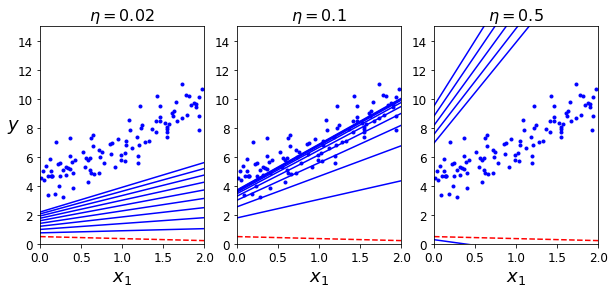

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

- x1: learning rate too low, take long time
- x2: Just fine
- x3: learning rate too high, algorithm __diverges__

1. To find a good learning rate:
- Using __Grid search__,
- need to limit the number of iterations so that grid search can __eliminate models that take too long time to converger__

2. How to set ___appropriate number of iterations___:
- too low, will still far away from optimal
- too high, waste time
- __solution__: 
   - set very large number of iteration
   - __interrupt__ the algorithm when the gradient vector becomes small
   - when its norm smaller than tiny number $\epsilon$ (__tolerance__)

# Stochastic Gradient Descent

1. __Batch Gradient Descent__:
   - uses the whole training set to compute the gradient at every set 
   - ___slow___

2. __Stochastic Grdient Descent__:
   - picks a random instance in the training set at every step and computes the gradients based only on that single instance
   - faster
   - possible to train on huge training set
   - Stochastic GD can be implemeted as ___out-of-core algorithm___
   - much less regular: the cost function will bounce up and down, __decreasing only on average__
   - once gets close to minimum, it will continue to bounce around, never settle
   - so when algorithm stops, the final parameter are good , but __not optimal__
   
3. Randomness is goo to escape from __local minimum__:
   - better chance to find global minimum

4. Solution to never settle at minimun:
   - gradually reduce the learning rate
   - It is called __simulated annealing__
   - The function that determines learning rate at each iteration is called __learning schedule__
   

Implementation of Stochastic GD with simple __learning schedule__

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

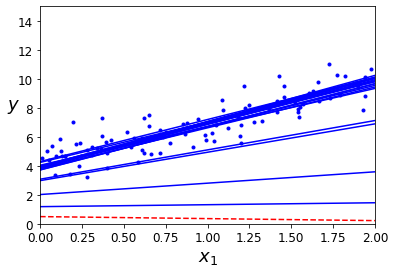

In [19]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

# we iterates rounds of m iteration(m=len(X_b)), each round is called an epoch
for epoch in range(n_epochs):
    for i in range(m):
        
        # only plot the first 20 steps of Stochastic GD
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [20]:
theta

array([[4.21076011],
       [2.74856079]])

### Perform Linear regression using Stochastic GD with scikit-learn

- ___SGDRegressor___ class
- defaults to optimizeing square error cost funciton
- runs for maximum 1000 epochs or until loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3)
- starts learning rate 0.1
- default leanring schedule as before
- no regularization

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# Mini-batch Gradient Descent

1. General Idea:
   - __at each step, instead of computing the gradients based on full traning set (as Batch GD) 
   - __instead of computing gradients based on only one instance (as in Stochastic GD)
   - It computes the gradients on __small random sets of instances called ___mini_batches__
2. Main advantage:
   - get a performance boost from hardware optimization of matrix operations, especially using GPUS
   - the algorithm's progress in _parameter space_ is less erratic(unstable) than Stochastic GD
   - Mini-batch GD will end up closer to the minimum than Stochastic GD
   - harder to escape from local minima
   

### Comparison between Batch GD, Mini-batch GD, and Stochastic GD

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
# theta has theta0 and theta1, it is a column vector
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

#-----------------------for mini-batch GD------------------------
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta # resulting theta

array([[4.25214635],
       [2.7896408 ]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

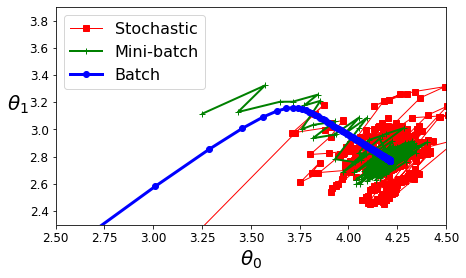

In [26]:
#--------------plot the path of theta-----------------------
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression

1. General Idea:
   - Use linear Model to fit nonlinear data
   - __add powers of each feature as new features, then train a linear model on this extended set of features__

In [27]:
# Generate some nonlinear data, based on quadratic equation with noise
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
# np.random.randn(m, 1) will generate random numbers 100x1 matrix, ranges in 0-1
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

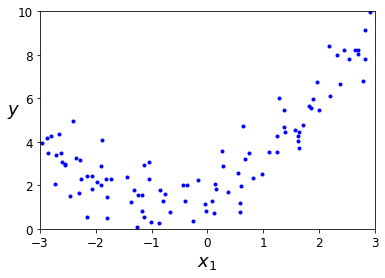

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [29]:
# Using scikit learn
from sklearn.preprocessing import PolynomialFeatures
# adding square of each feature in the training set as a new feature
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [30]:
X_poly[0] # X_poly contains the original feature of X and the square of this feature

array([-0.75275929,  0.56664654])

In [31]:
# Fit the LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

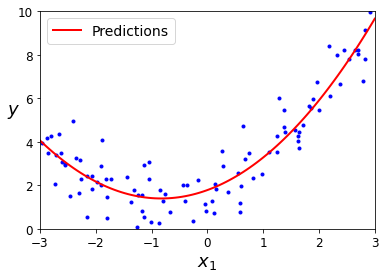

In [32]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

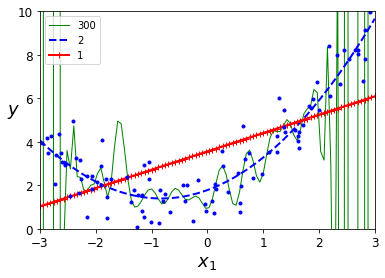

In [33]:
# comparison between high-degree polynomial regression and pure linear model and quadratic model
# the high degree polynomial (d= 300) is severly overfitting
# pure linear model is underfitting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

## Learning Curves
- Using cross-validation to get an estimation of model's generalization performance
- Another way: __learning curves__
  - Plot the __model's performance__(RMSE) on the training set and validation set as a function of the __training set size__(or traning iteration)
  - To generate the plot, train the model several times on different sized subsets of the training set
  
  

In [34]:
# given some training data, plots the learning curves of a model:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    # iterates from 1 instance to the whole instance of training sets
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        # make prediction based on m instances subsets
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

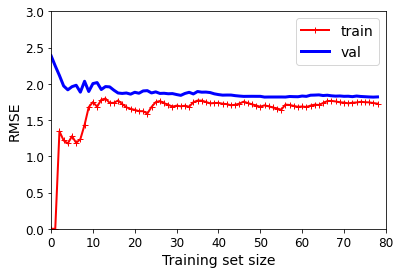

In [35]:
# First Method: Pure linear regression, underfitting
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book

plt.show()                                      # not shown

This is a very typical __underfitting__
- Both curve reached a plateau, they are close and high (cannot make the erro much better or worse)
- at first the traning set error very low (generalize well on only a few data), but get worse
- at first the performance on validation set very bad

If the model is underfitting training data, adding more data will not help
- should use a more complex model 
- or better features

10th-degree polynomial model

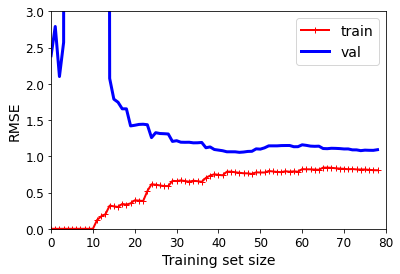

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()                        # not shown

10-degree polynomial regression model:
1. Error on training set much lower than the linear regression model
2. There's a gap between the two curves. This means the model performs significantly better on traning data than on validation data, which is hallmark of an __overfitting model__ !

One way to imporve overfitting model:
- feed it more training data, until the validation error reaches the training error

## The Bias/Variance Trade-off
Model's generalization error can be expressed as sum of three different erros:
1. Bias
   - This is due to wrong assumptions. Such as assuming data is linear, but actually quadratic
   - Likely to underfit the data
   
2. Variance
   - Model's __excessive sensitivity__ to small variations in training data.
   - High-degree polynomial model, likely to have high variance, overfit the data
   
3. Irreducible error
   - due to __noisiness of the data__ itself.
   - only way to reduce this is data cleaning

Trade off:
- Increase the model complexity, will increase variance, decrease bias
- Reducing model complexity, will reduce variance but increase bias

# Regularized Linear Models

1. General Idea
   - Reduce overfitting, is to regularize the model (constrain)
   - regularize polynomial model--reduce number of polynomial degrees
   - for linear model, is to __constraining the weights of the model__
   - look at Ridge Regression, Lasso Regression, Elastic Net

## Ridge Regression
- a regularized version of Linear regression
- a regularized term added to cost function
- should only be added to the cost function during training. 
- after training, unregularized performance measure to evaluate the model’s performance.
- Bias term $\theta0$, is not regularized
- Important to scale the data first

In [37]:
np.random.seed(42)
m = 20

# Create a random 20 training set from 0-3 
X = 3 * np.random.rand(m, 1)
# create a linear model with some noise
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# for the training data
X_new = np.linspace(0, 3, 100).reshape(100, 1)

#---------------------Ridge Regression------------------
from sklearn.linear_model import Ridge
#"cholesky" method for matrix factorization, a closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])


__Perform Ridge Regression either by
computing a closed-form equation or by performing Gradient Descent__

In [40]:
# Using Stochastic GD
sgd_reg = SGDRegressor(penalty="l2")
# penalty="l2" hyperparameter sets  the type of regularization term to use
#  "l2" indicates that you want SGD to add a regularization term to the
#   cost function equal to half the square of the ℓ norm of the weight vector
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

In [41]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

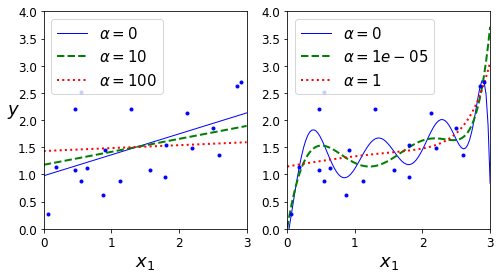

In [42]:


from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

In [43]:
# Using Stochastic GD
# penalty="l2" hyperparameter sets  the type of regularization term to use
#  "l2" indicates that you want SGD to add a regularization term to the
#   cost function equal to half the square of the ℓ norm of the weight vector
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression 
- another regularized version of Linear Regression
-  adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector
- For Ridge Regression: half the square of the ℓ norm


/home/chenlequn/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


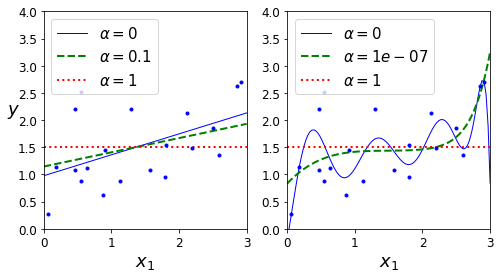

In [44]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)


plt.show()

__important characteristic of Lasso Regression__:
-  eliminate the weights of the least important features (i.e., set them to zero)
- e.g. dashed line in the righthand plot(with α = 10 ), looks quadratic
  - all the weights for the high-degree polynomial features are equal to zero
  - Lasso Regression automatically performs feature selection and outputs a sparse model 

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
# you could instead use SGDRegressor(penalty="l1")

array([1.53788174])

In [52]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

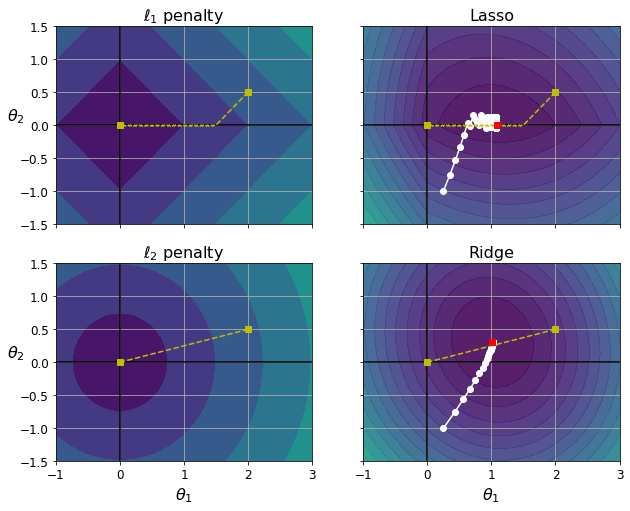

In [53]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


plt.show()

## Elastic Net
- Mix of Ridge Regression and Lasso Regression
-  control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

In [47]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early stopping

- stop training as soon as validation algorithm reaches minumun
- the validation error stops decreasing and starts to go back up. 
   - This indicates that the model has started to __overfit__ the training data. 

In [48]:
np.random.seed(42)
m = 100
#Create a dataset with quadratic function
X = 6 * np.random.rand(m, 1) - 3 # X ranges -3 to 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Early stopping example:

In [49]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Create the graph:

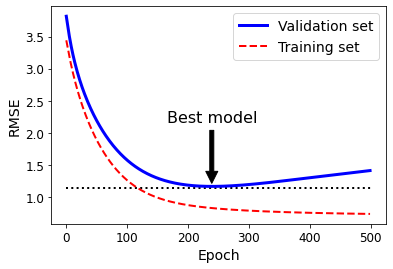

In [50]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
# with warm_start=True, when the fit() method is called it continues
# training where it left off, instead of restarting from scratch.

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [51]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

# Logistic Regression

- Logistic regression can be used for classification
- It estimate the __probability__ that an instance belongs to a particular class (e.g. emal spam
- If probability greater than 50%, positive class, labled "1"
- Ig probability smaller than 50%, negative class, "0"
- Binary classifier


## Estimating Probability
1. Working Principle
   - Just like linear regression model, computes ___weighted sum of input features plus a bias term__
   - Outputs the __logistic__ of the result, not the result itself

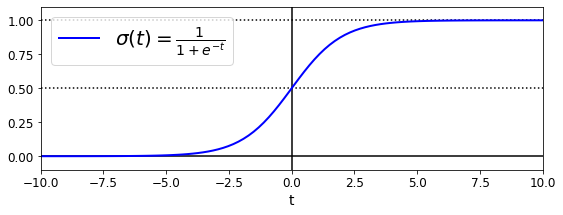

In [55]:
t = np.linspace(-10, 10, 100)

#logistic function plot
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

2. Cost function
   - goal: model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). 
   - no known closed-form equation to compute the value of θ that minimizes this cost function 
   -  cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum 

# Decision Boundaries


In [57]:
# Using Iris dataset to illustrate logistic regression 
# dataset that contains the sepal and petal length and width of 150 iris flowers of
# three different species: Iris setosa, Iris versicolor, and Iris virginica 
    
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [58]:
# build a classifier to detect the Iris virginica type based only on the
# petal width feature
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [59]:
# train a Logistic Regression model:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

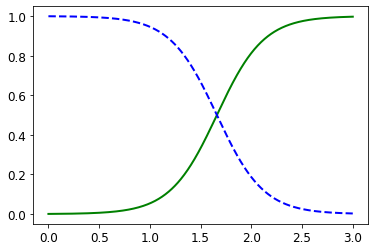

In [60]:
# model’s estimated probabilities for flowers with petal widths
# varying from 0 cm to 3 cm 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

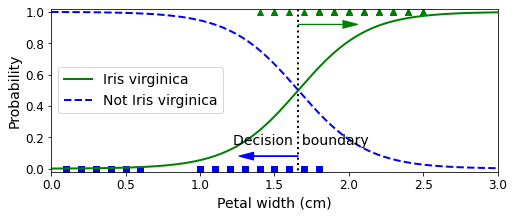

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [62]:
decision_boundary # boundary that both class has 50% possibility

array([1.66066066])

In [63]:
# If using predict() method instead of predict_proba()
# it will return the higher possibility class (the one lager than 50%)
log_reg.predict([[1.7], [1.5]])

array([1, 0])

This time using two features: petal width and length (X0 and X1)

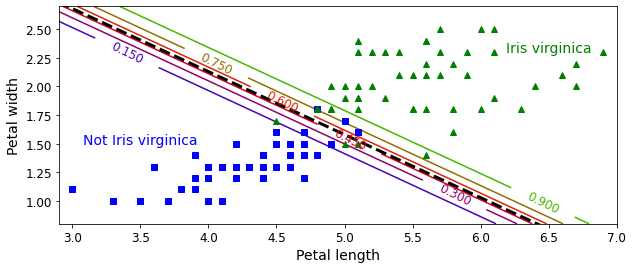

In [64]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

# Softmax Regression
1. Definition
    - Logistic regression can be generalized to support __multiple classes directly__ 
    - without having to train and combine multiple binary classifiers
    - Softmax Regression, or Multinomial Logistic Regression.

2. Idea
    - when given an instance x, the Softmax Regression model first computes a score for each class
    -  then estimates the __probability__ of each class by applying the softmax function (normalized exponential) to the scores. 
    - Softmax Regression classifier predicts the class with the highest estimated probability
    
 3. Training
     -  objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). 
     - __cross entropy cost function__:penalizes the model when it estimates a low probability for a target class

### Using Softmax Regression to classify iris flowers into all three classes
- Scikit-Learn’s LogisticRegression uses one-versus-the-rest by default when
  you train it on more than two classes,
- set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression

In [65]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# must also specify a solver that supports Softmax Regression, such as the
# "lbfgs" solver , applies ℓ regularization by default, which you can control using the
# hyperparameter C: The higher the value of C, the less the model is regularized
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

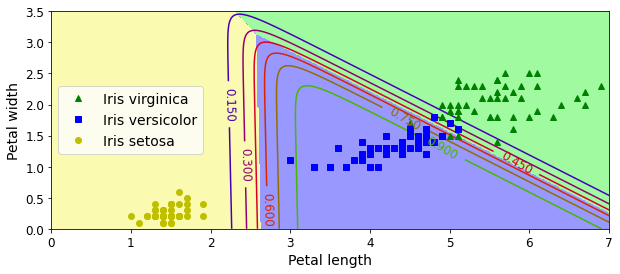

In [66]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [67]:
softmax_reg.predict([[5, 2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

 at the point where all decision
boundaries meet, all classes have an equal estimated probability of 33%.